In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder ,StandardScaler

df  = pd.read_csv('breast-cancer.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# Check if there is any null values 

In [2]:
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Removing The columns that has no effect & encoding the categorical data

In [5]:
df.drop('id' , axis= 1 ,inplace= True)


encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

# BoxPlot to detect the outliers

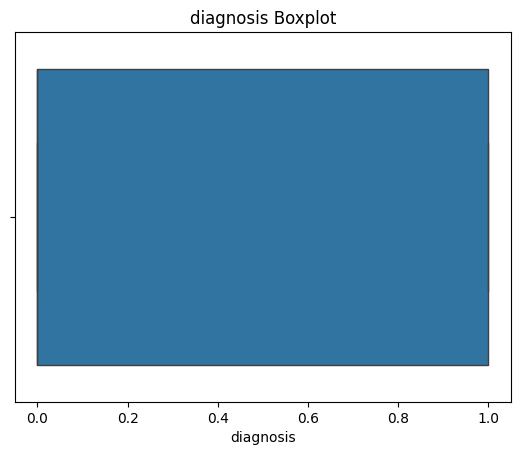

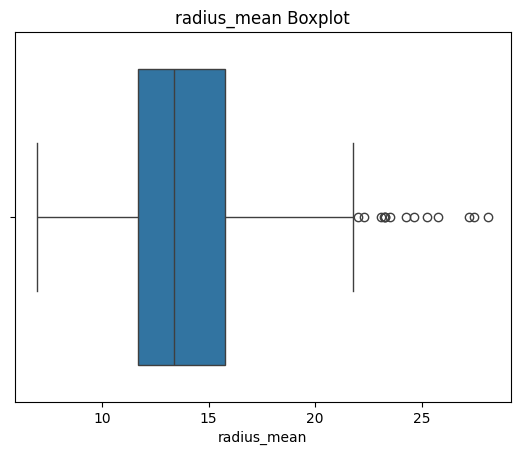

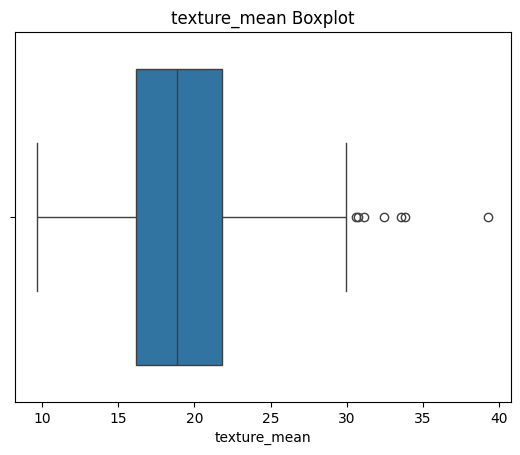

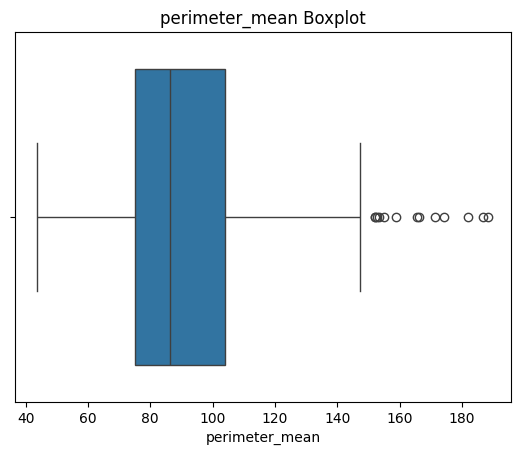

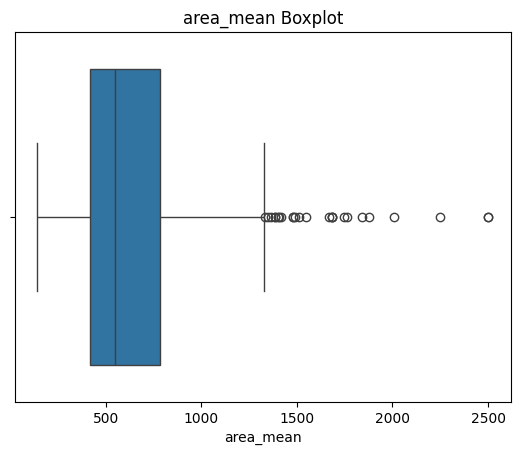

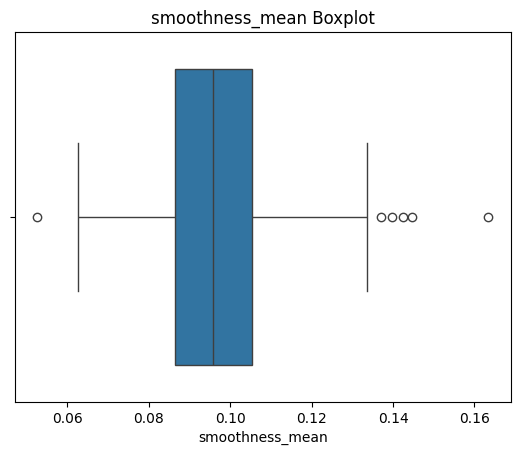

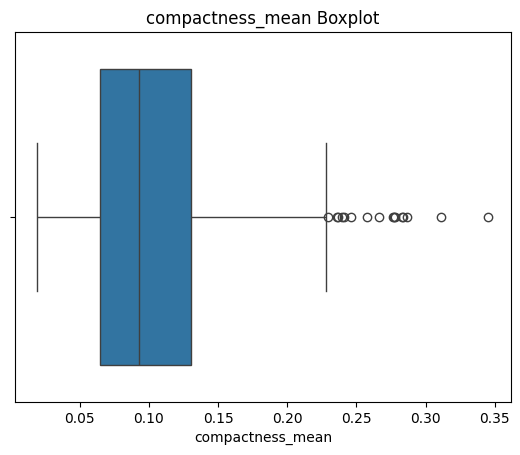

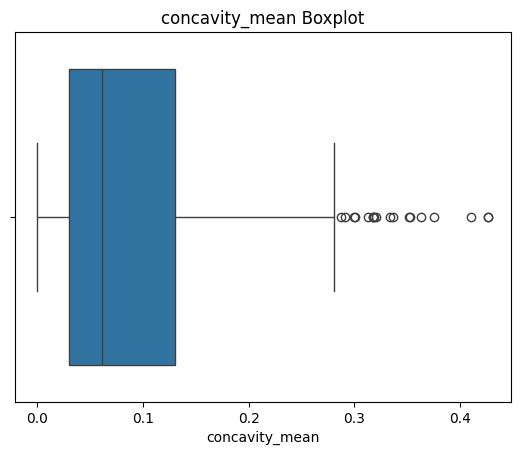

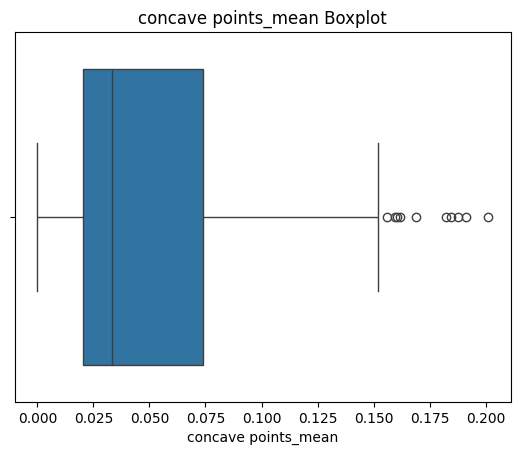

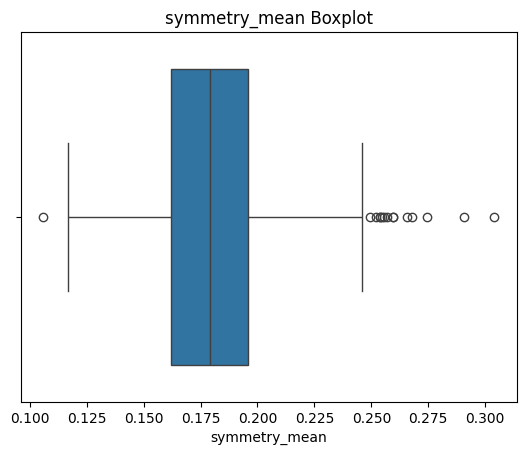

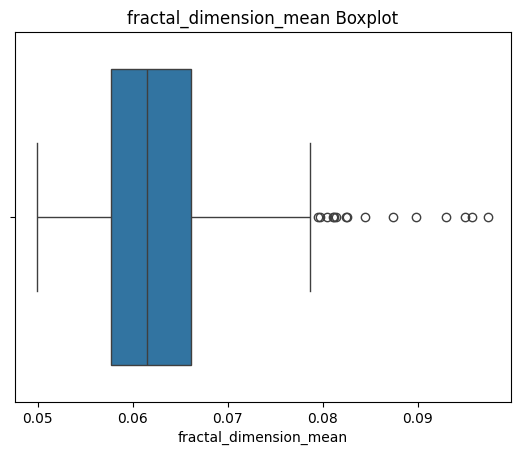

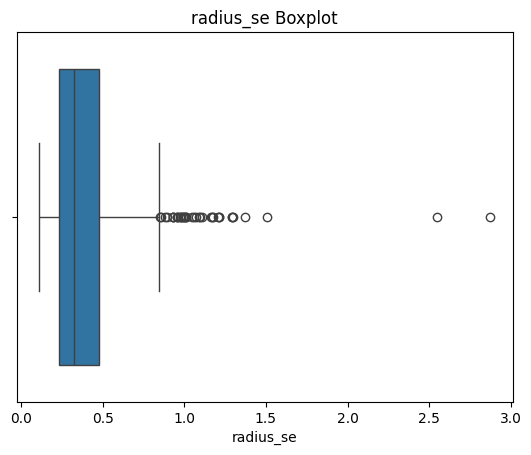

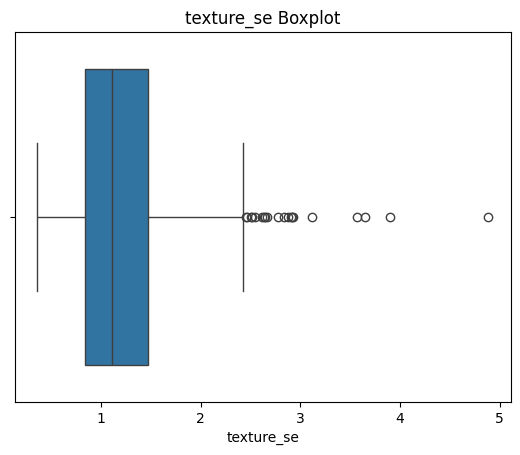

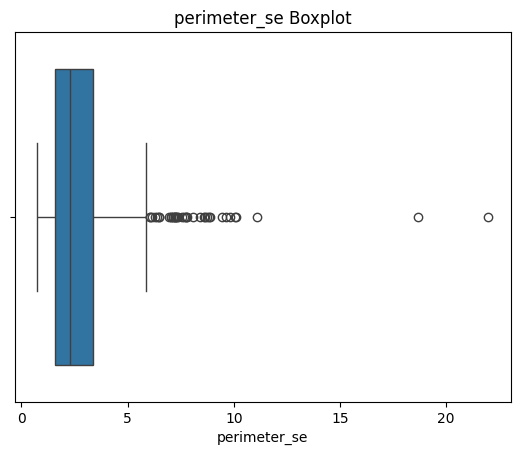

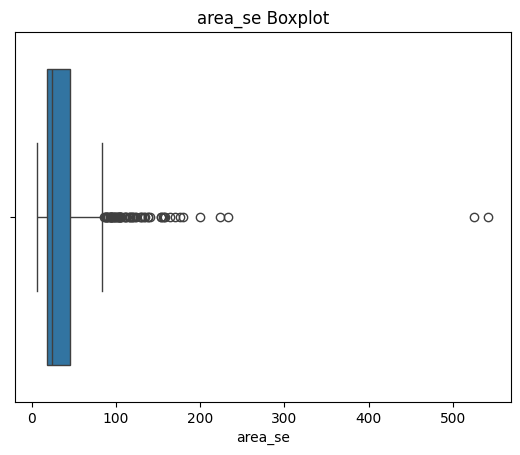

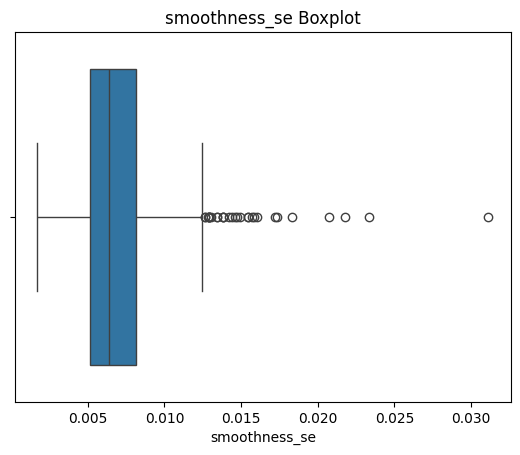

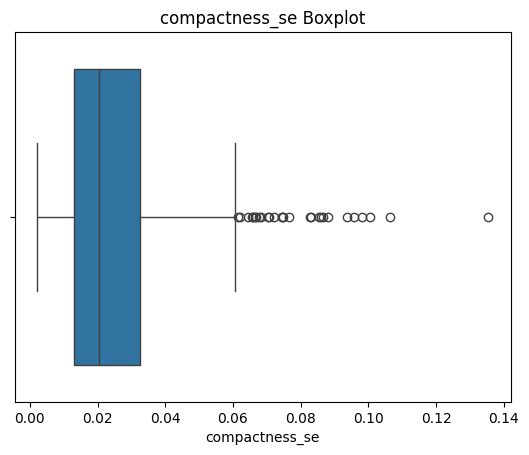

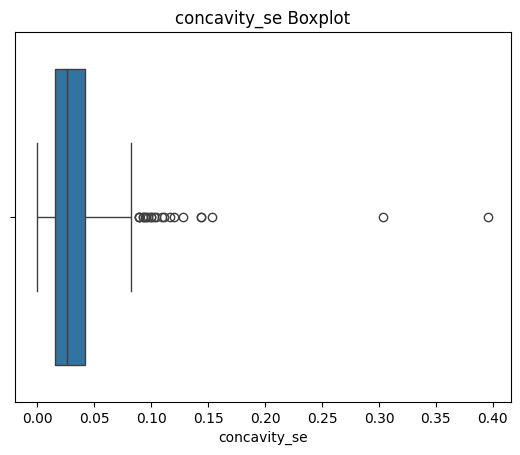

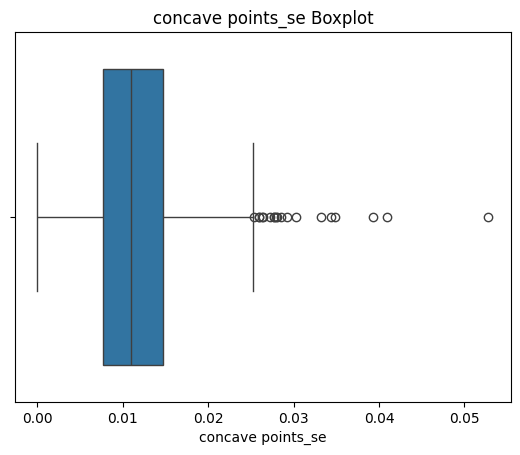

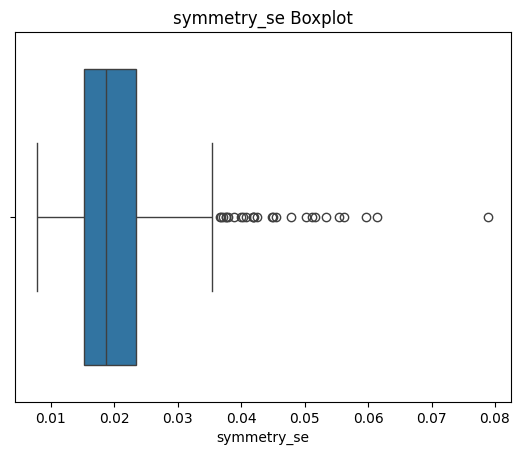

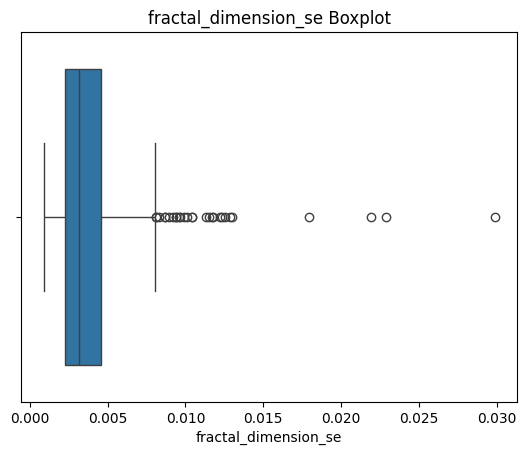

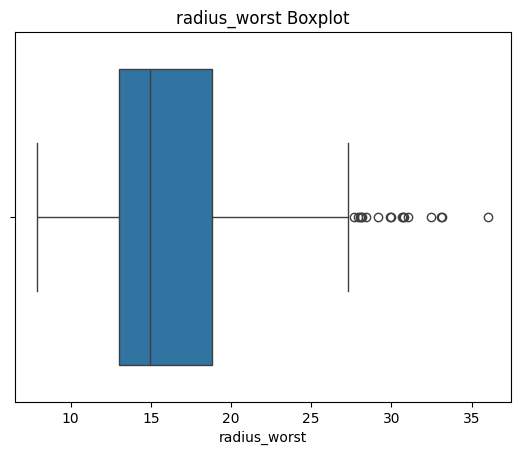

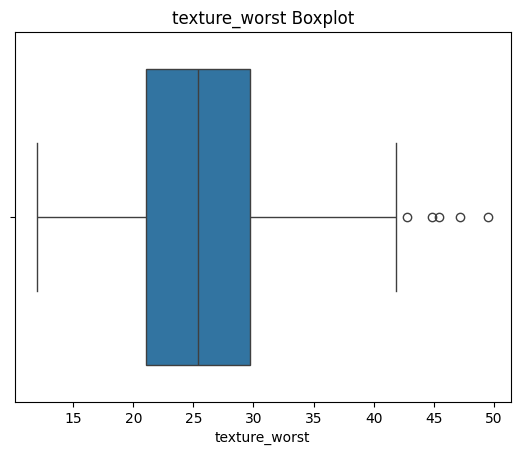

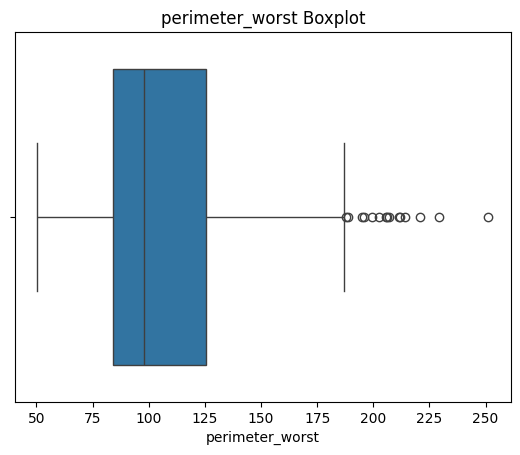

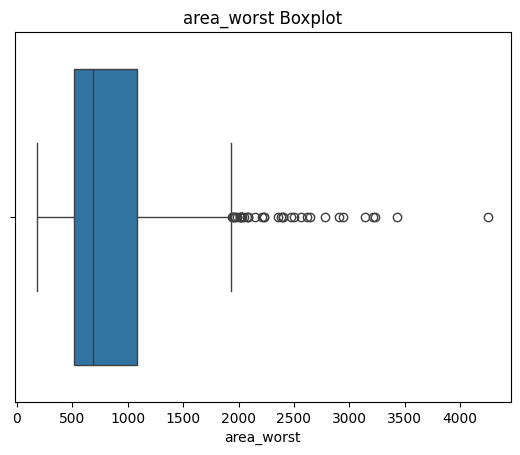

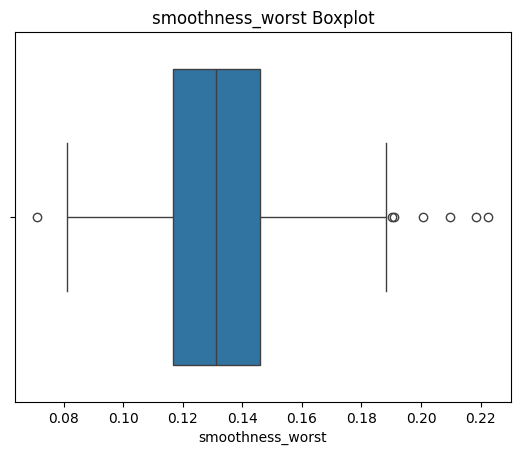

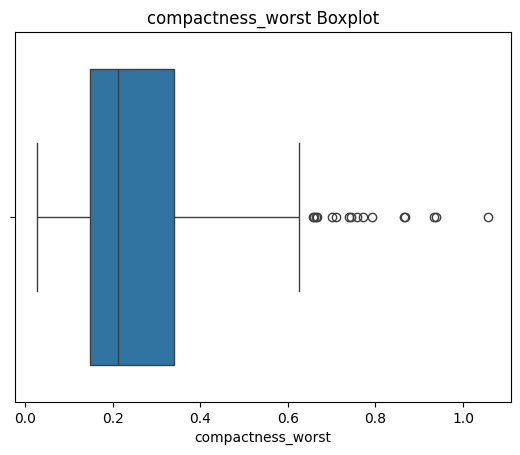

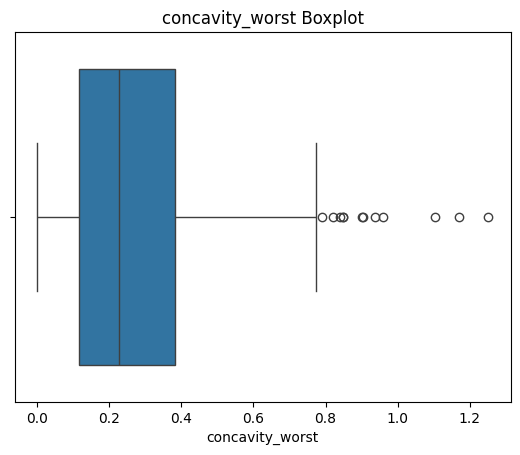

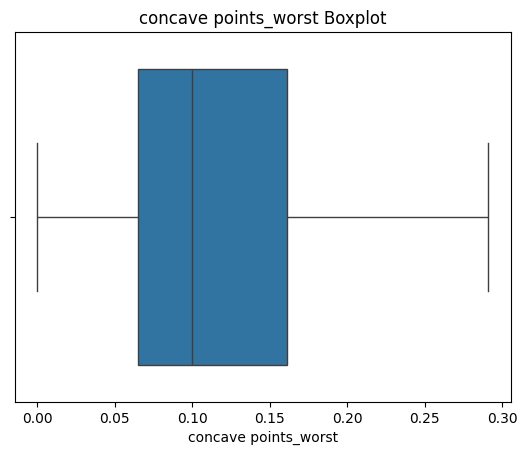

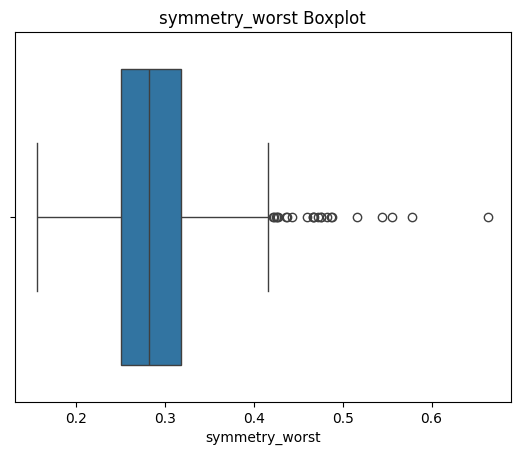

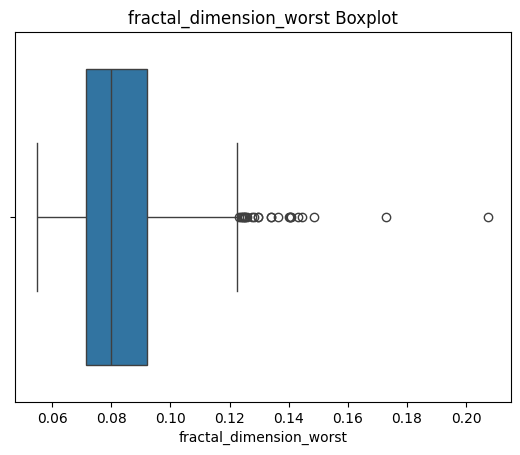

In [5]:
for column_name in df.columns:
    sns.boxplot(x=df[f'{column_name}'])
    plt.title(f'{column_name} Boxplot')
    plt.show()

# Handeling the outliers with IQR

In [6]:
outliers_features = [col for col in df.columns if col not in ['diagnosis', 'concave points_worst']]
for i in outliers_features:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)

    lower_boundary = df[i].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[i].quantile(0.75) + (IQR * 1.5)
    df[i]= np.where(df[i] > upper_boundary, upper_boundary,np.where(df[i] < lower_boundary, lower_boundary,df[i]))

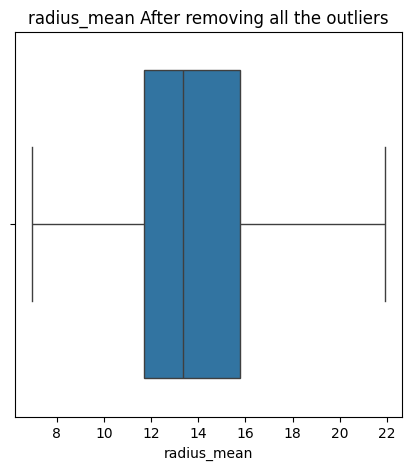

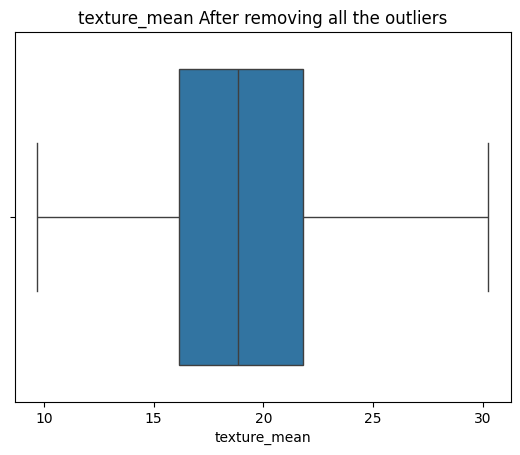

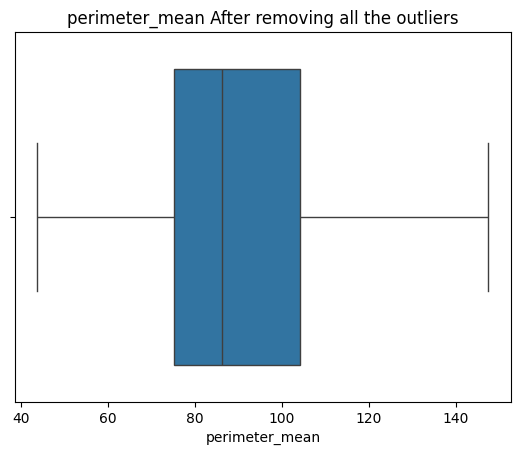

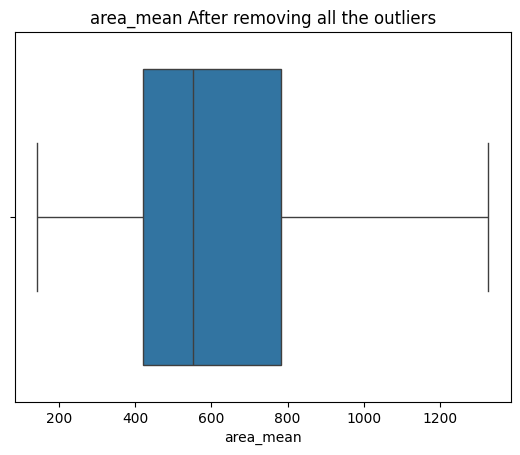

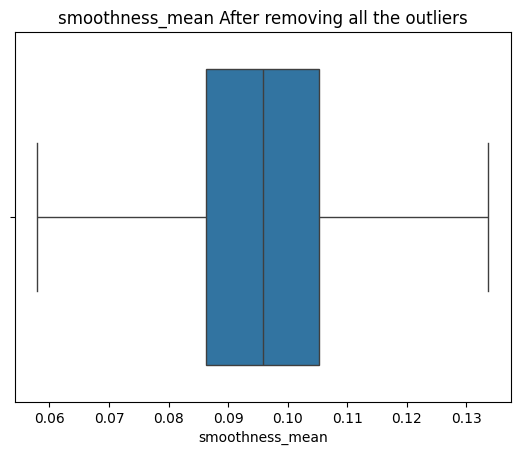

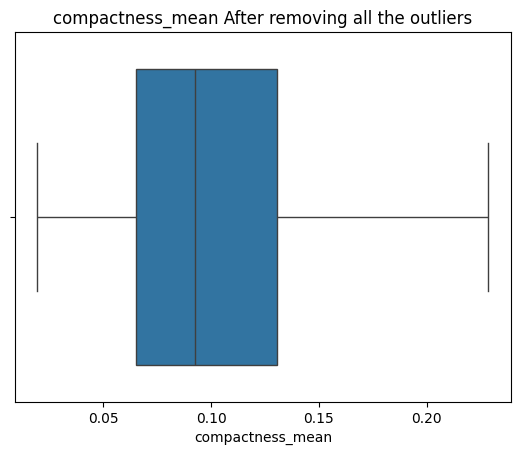

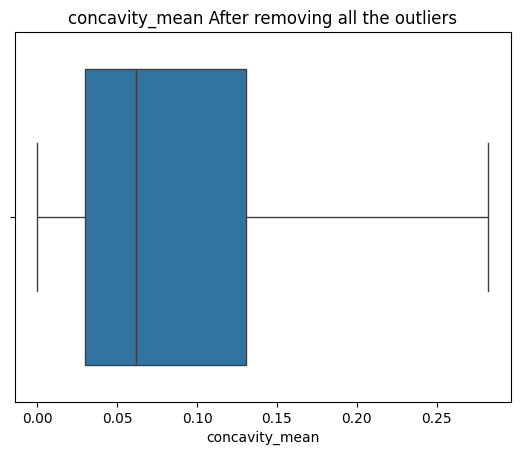

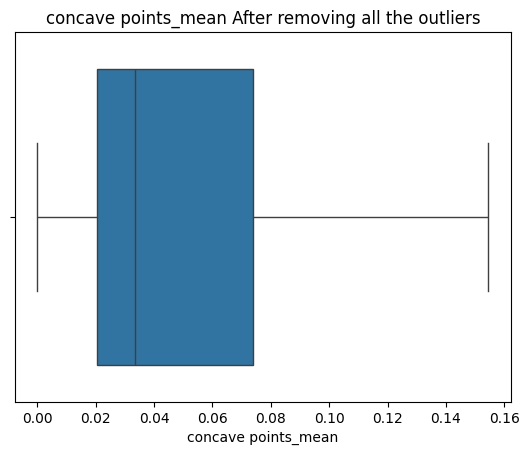

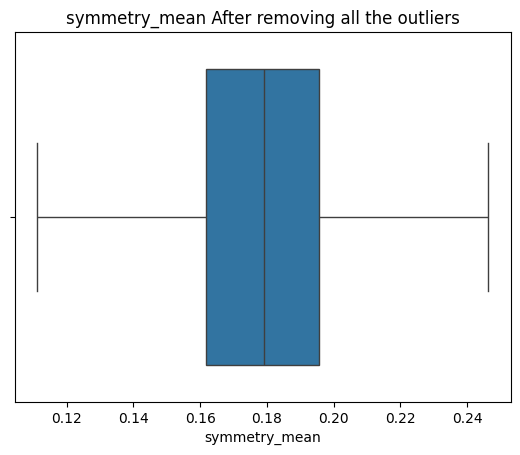

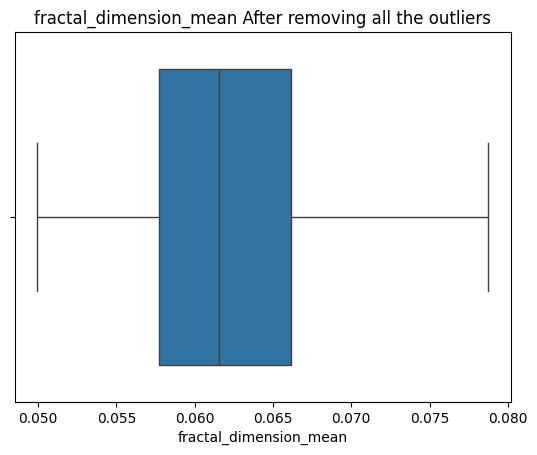

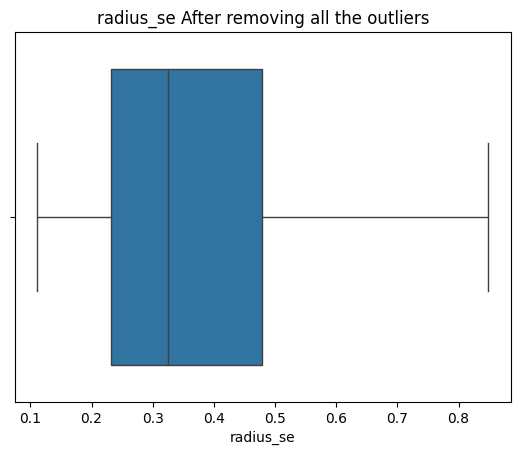

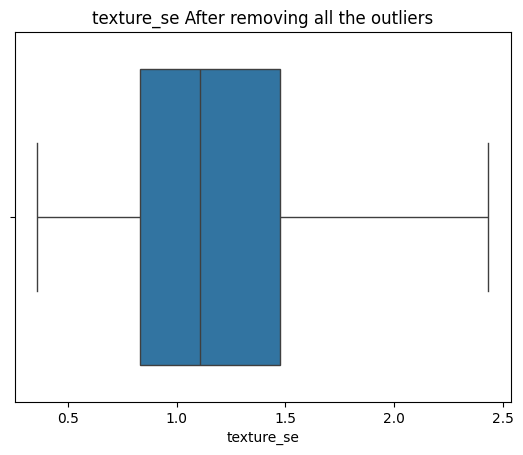

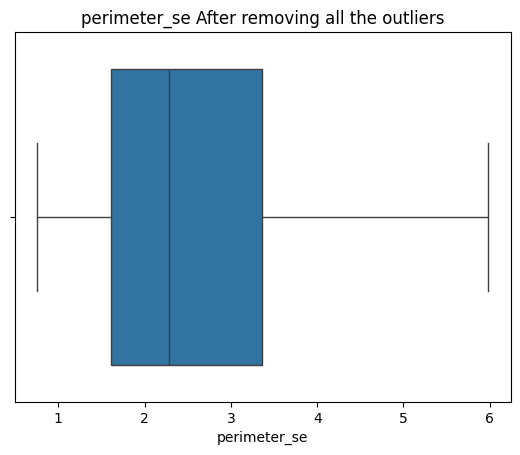

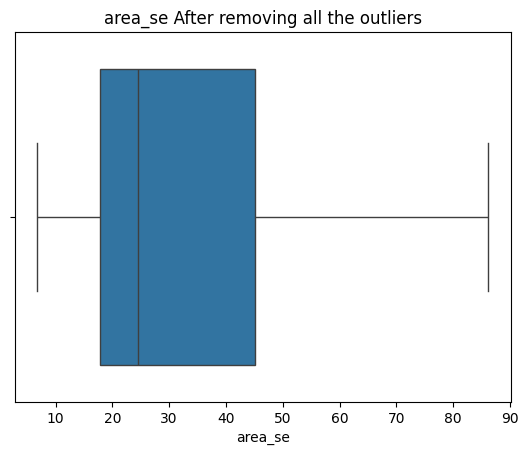

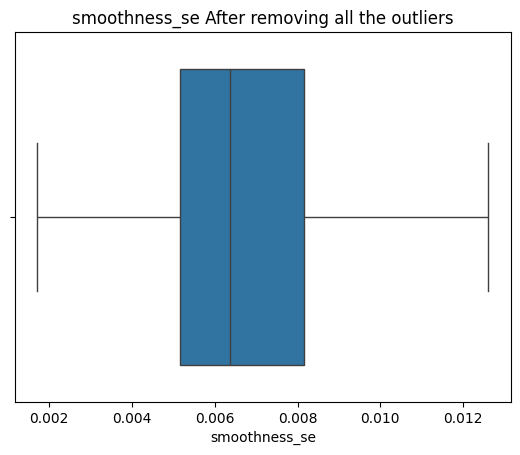

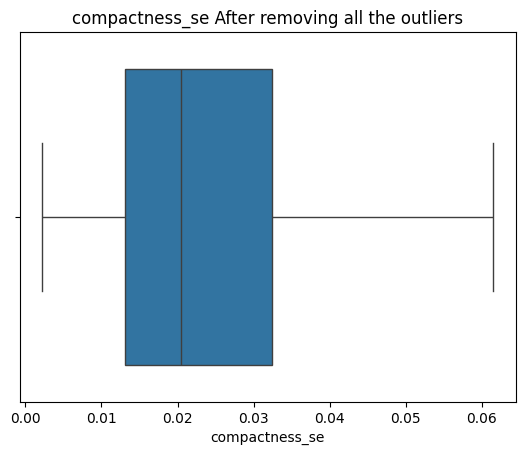

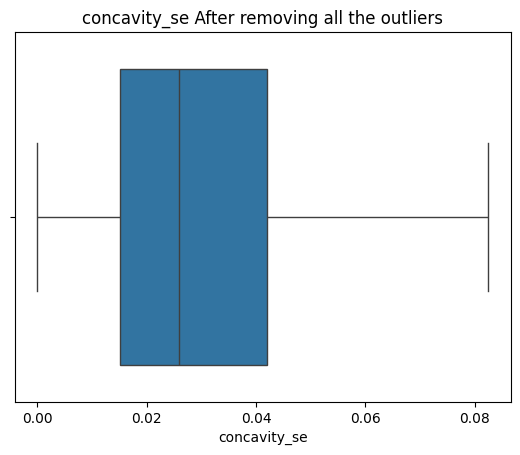

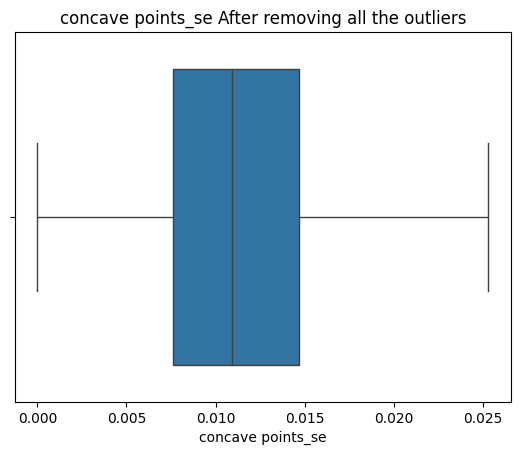

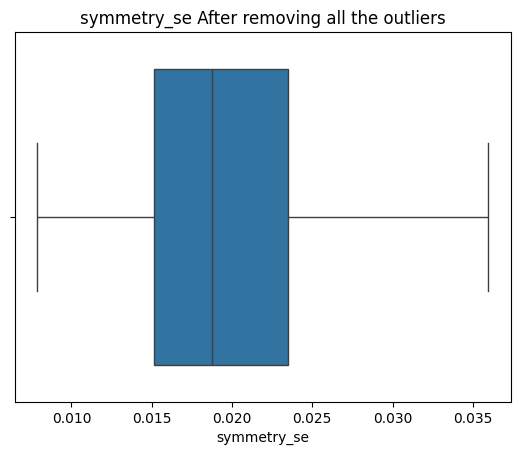

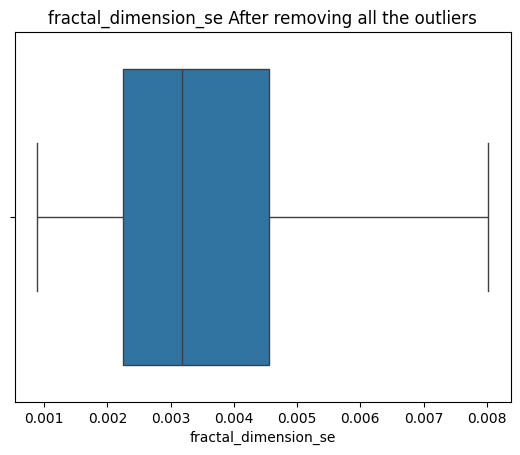

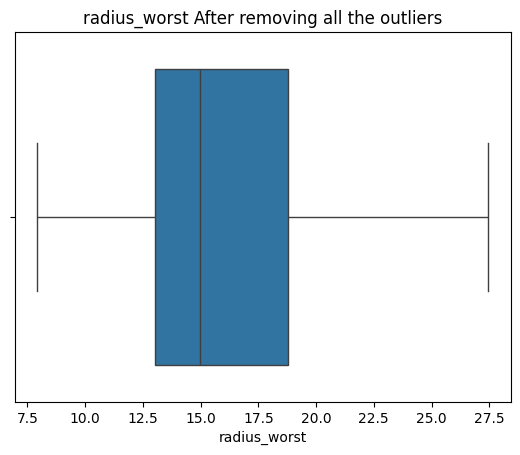

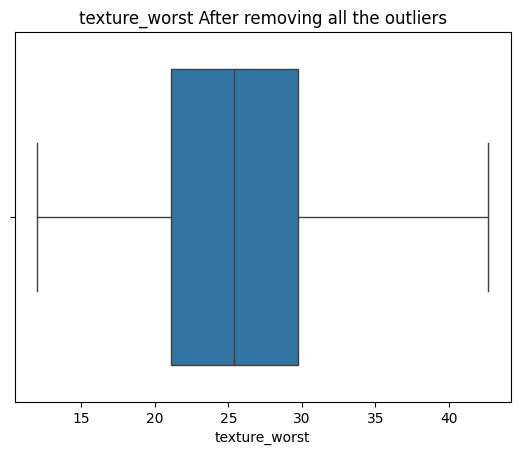

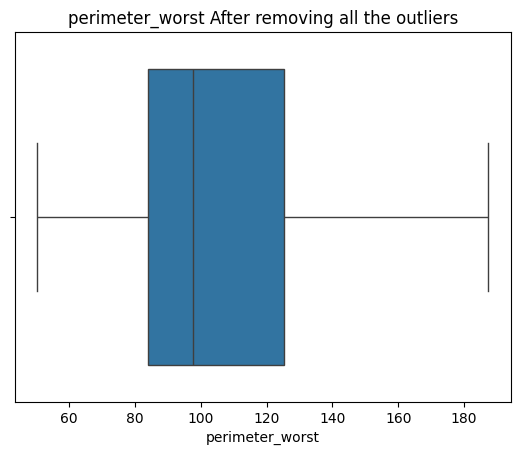

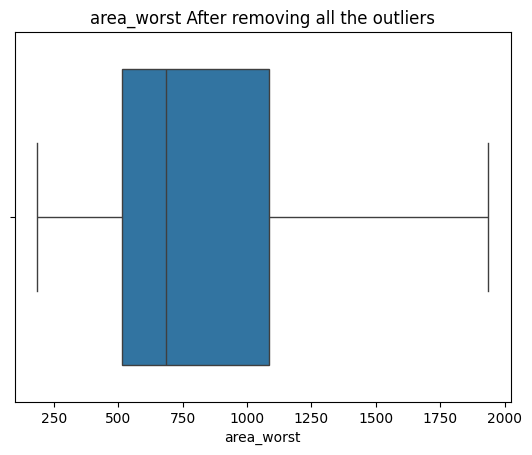

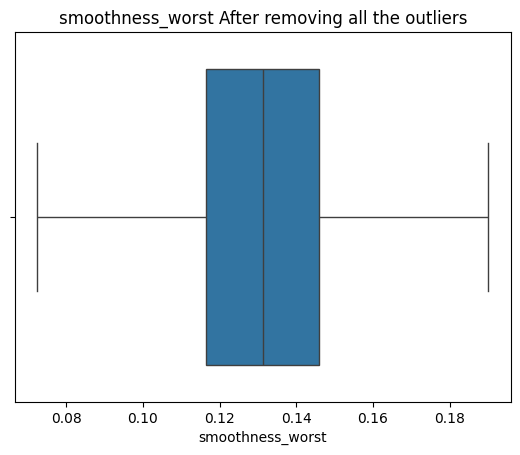

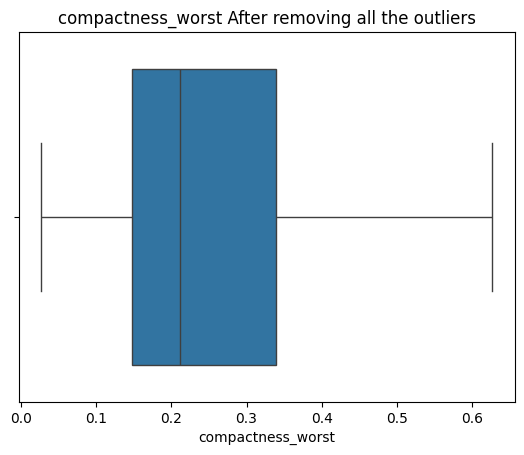

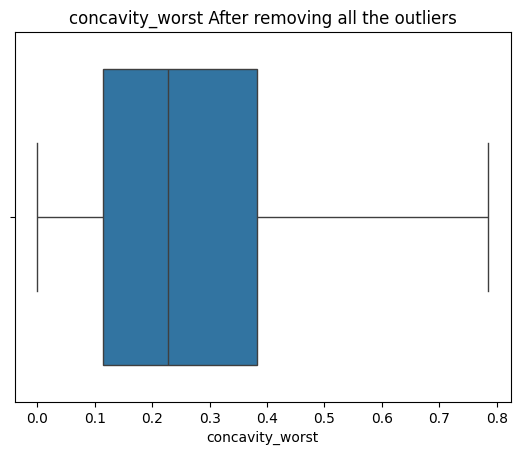

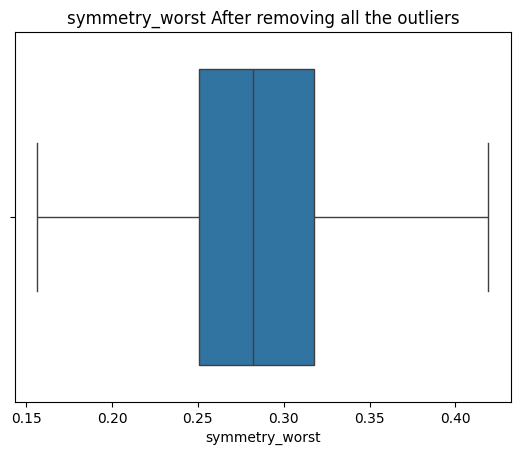

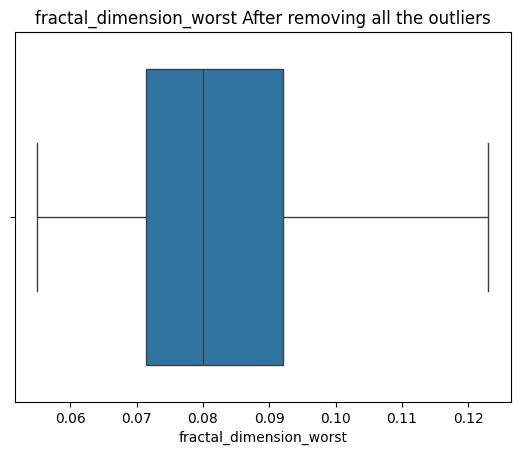

In [7]:
plt.figure(figsize=(5,5))
for i in outliers_features:
    sns.boxplot(x=df[i])
    plt.title(f'{i} After removing all the outliers')
    plt.show()

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df.sample(10))
plt.show()


# Check correlation between the attributes with each other

<Axes: >

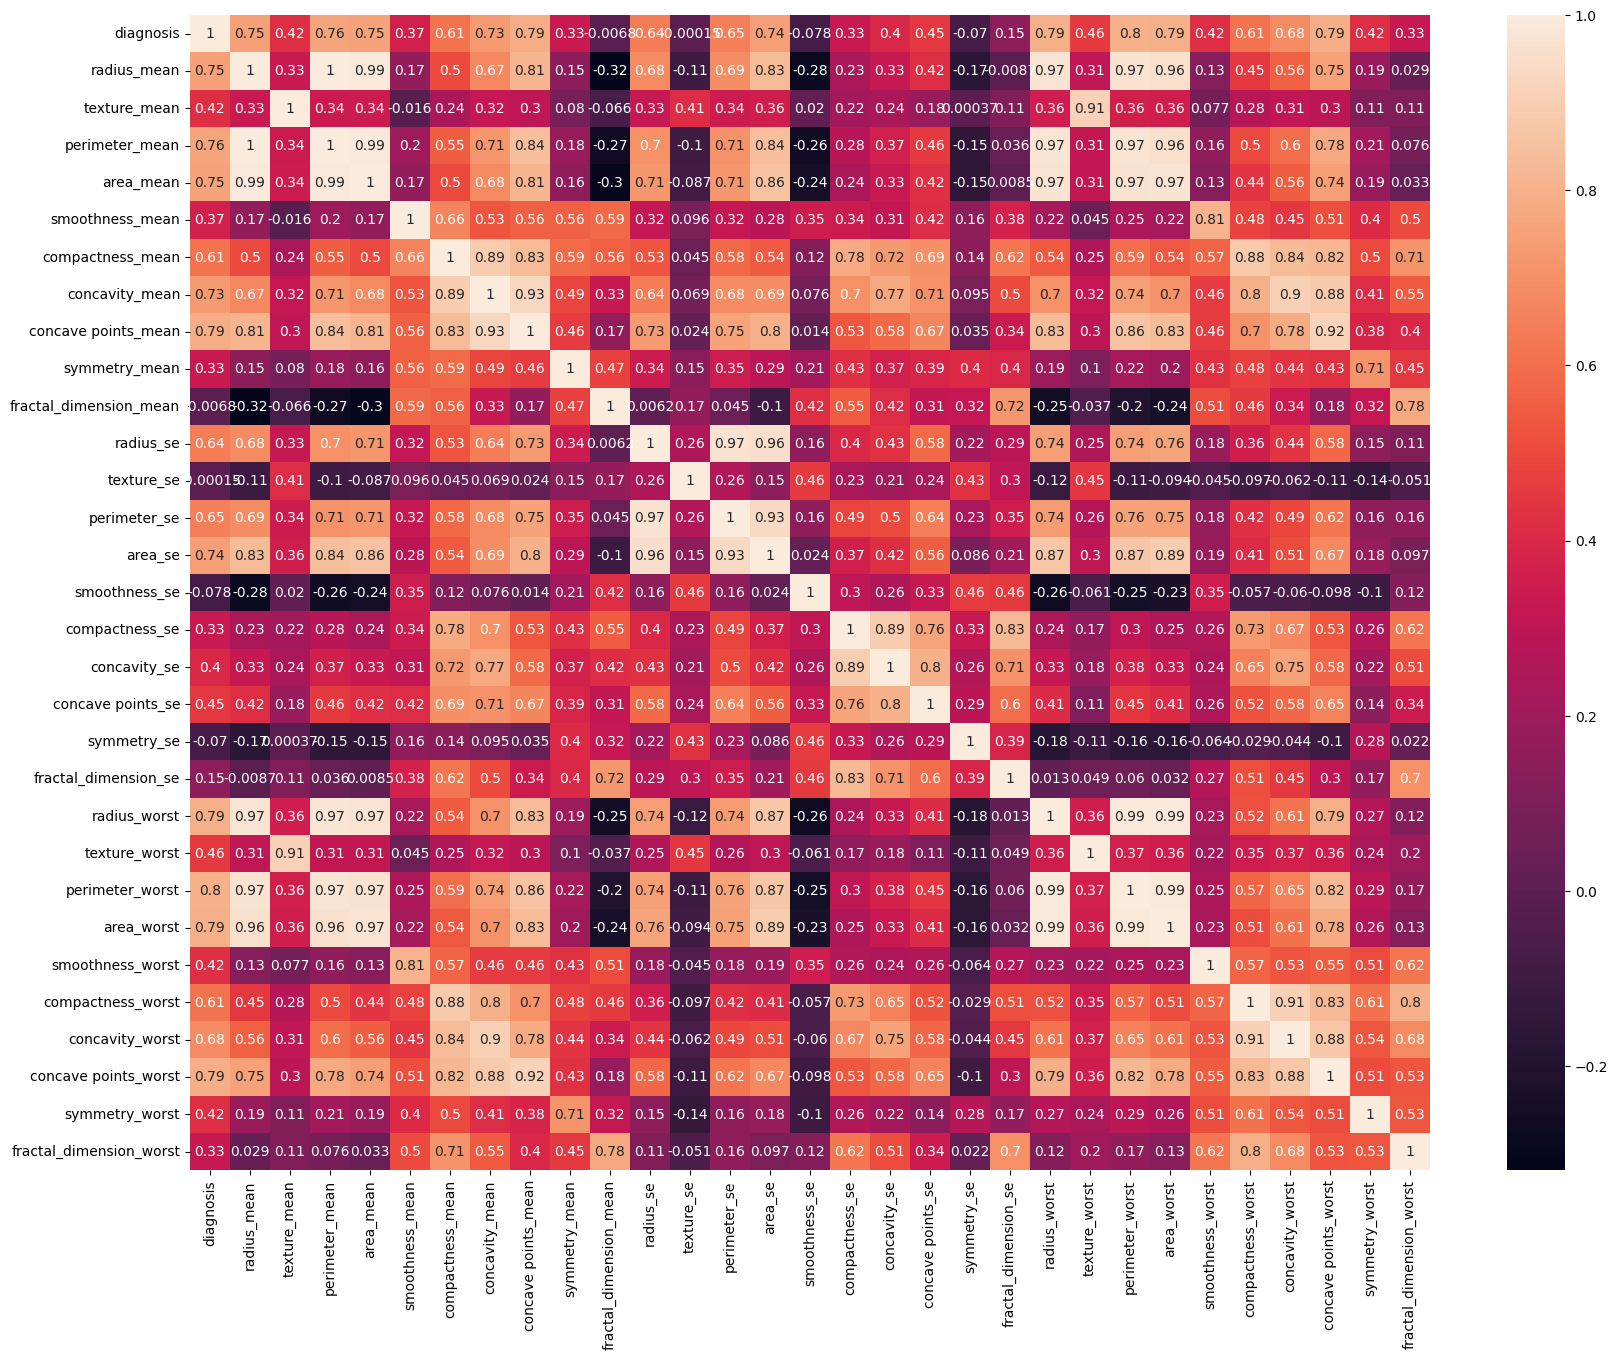

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [9]:
import numpy as np

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = []
already_considered = set()

for column in upper.columns:
    if column not in already_considered:
        correlated_columns = [col for col in upper.index[upper[column] > threshold] if col not in already_considered]
        if correlated_columns:
            # Mark these columns as considered
            already_considered.update(correlated_columns)
            # Drop all but the first highly correlated column
            to_drop.extend(correlated_columns[1:])

df_reduced = df.drop(columns=to_drop)

print("Dropped columns:", to_drop)
print("Remaining columns:", df_reduced.columns)


Dropped columns: ['concavity_mean', 'area_se', 'radius_worst']
Remaining columns: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


# Compare the mean values of each column grouped by 'diagnosis' column

In [10]:
df.groupby('diagnosis').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
0            12.146524     17.903445       78.075406  462.790196   
1            17.290047     21.530259      114.224033  937.784434   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.092400          0.080085        0.045562   
1                 0.102776          0.142184        0.156610   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.025717       0.174020                0.062638  ...   
1                     0.087005       0.192041                0.062548  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
0             13.379801      23.515070        87.005938   558.899440   
1             20.905849      29.240991       139.878467  1339.954953   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                  0.124934           0.182673         0.164830   
1                  0.144462           0.363062         0.443757   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.074444        0.270236                 0.079295  
1                      0.182237        0.316884                 0.090159  

[2 rows x 30 columns]

# Selecting features and target

In [10]:
X = df_reduced.drop('diagnosis' , axis= 1)
y = df['diagnosis']

Scaler1 = StandardScaler()

X = Scaler1.fit_transform(X)

# Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

# Algorithms with StandardScaler

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# Train accuracy of Logistic Regression model 

In [13]:
lr.score(X_train , y_train)

0.9868131868131869

# Test accuracy of Logistic Regression model 

In [14]:
lr.score(X_test , y_test)

1.0

# Confusion matrix of Logistic Regression model

In [16]:
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true= y_test , y_pred= y_pred)
cm

array([[75,  0],
       [ 0, 39]], dtype=int64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

for i in range(1, 6):
    KNN = KNeighborsClassifier(n_neighbors=i)

    KNN.fit(X_train, y_train)

    y_pred = KNN.predict(X_test)

    print(f"Accuracy with k={i}: ", accuracy_score(y_test, y_pred))
    print(f"Confusion Matrix with k={i}:\n", confusion_matrix(y_test, y_pred))

Accuracy with k=1:  0.9649122807017544
Confusion Matrix with k=1:
 [[71  4]
 [ 0 39]]
Accuracy with k=2:  0.9473684210526315
Confusion Matrix with k=2:
 [[72  3]
 [ 3 36]]
Accuracy with k=3:  0.956140350877193
Confusion Matrix with k=3:
 [[72  3]
 [ 2 37]]
Accuracy with k=4:  0.9473684210526315
Confusion Matrix with k=4:
 [[72  3]
 [ 3 36]]
Accuracy with k=5:  0.9473684210526315
Confusion Matrix with k=5:
 [[71  4]
 [ 2 37]]


In [18]:
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DT = DecisionTreeClassifier()

DT = DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree
Accuracy:  0.9210526315789473
Confusion Matrix:
 [[69  6]
 [ 3 36]]


# Convert the features array to dataframe to plot the decision tree as it only accepts dataframe

In [19]:
X = pd.DataFrame(X)

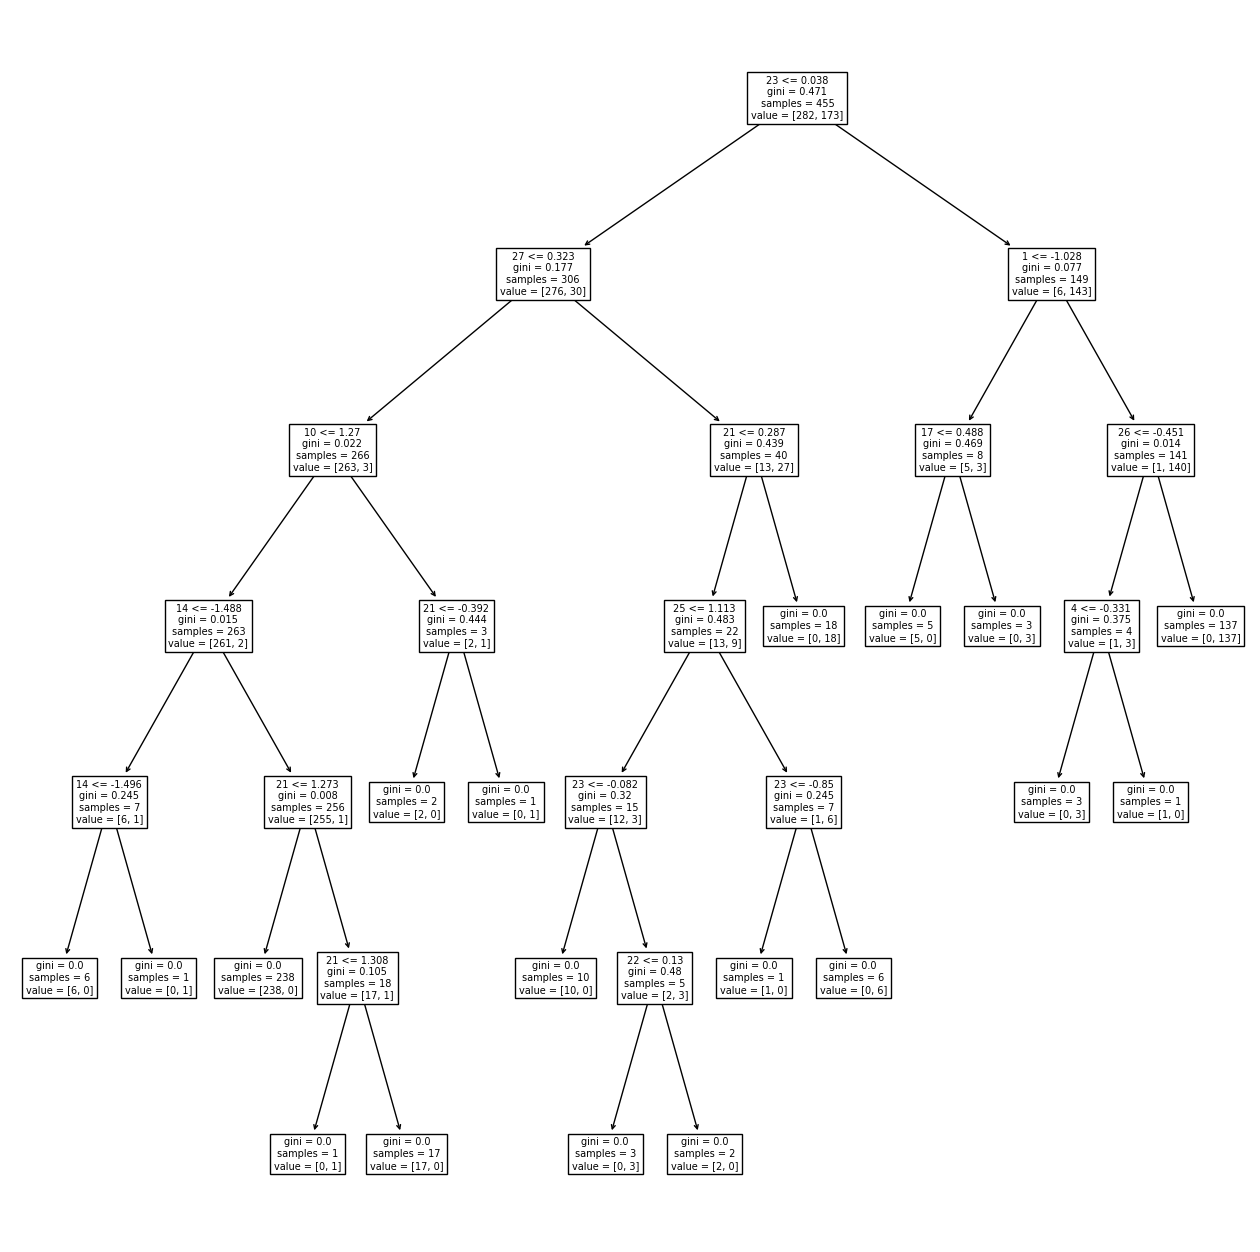

In [20]:
plt.figure(figsize=(16, 16))
tree.plot_tree(DT, feature_names=X.columns)
plt.show()

# Ploting histogram for some columns

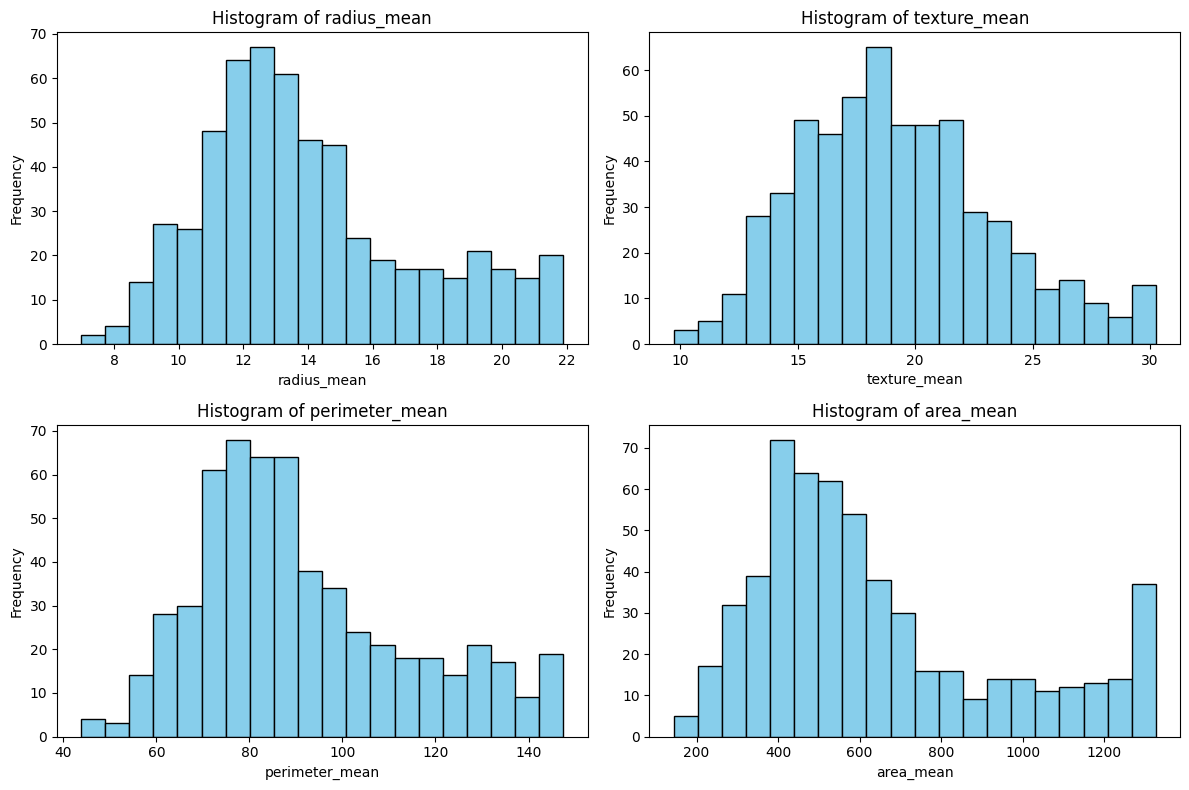

In [21]:
choosed_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(12, 8))
for i, col in enumerate(choosed_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


# Subplots without boxplots inside it

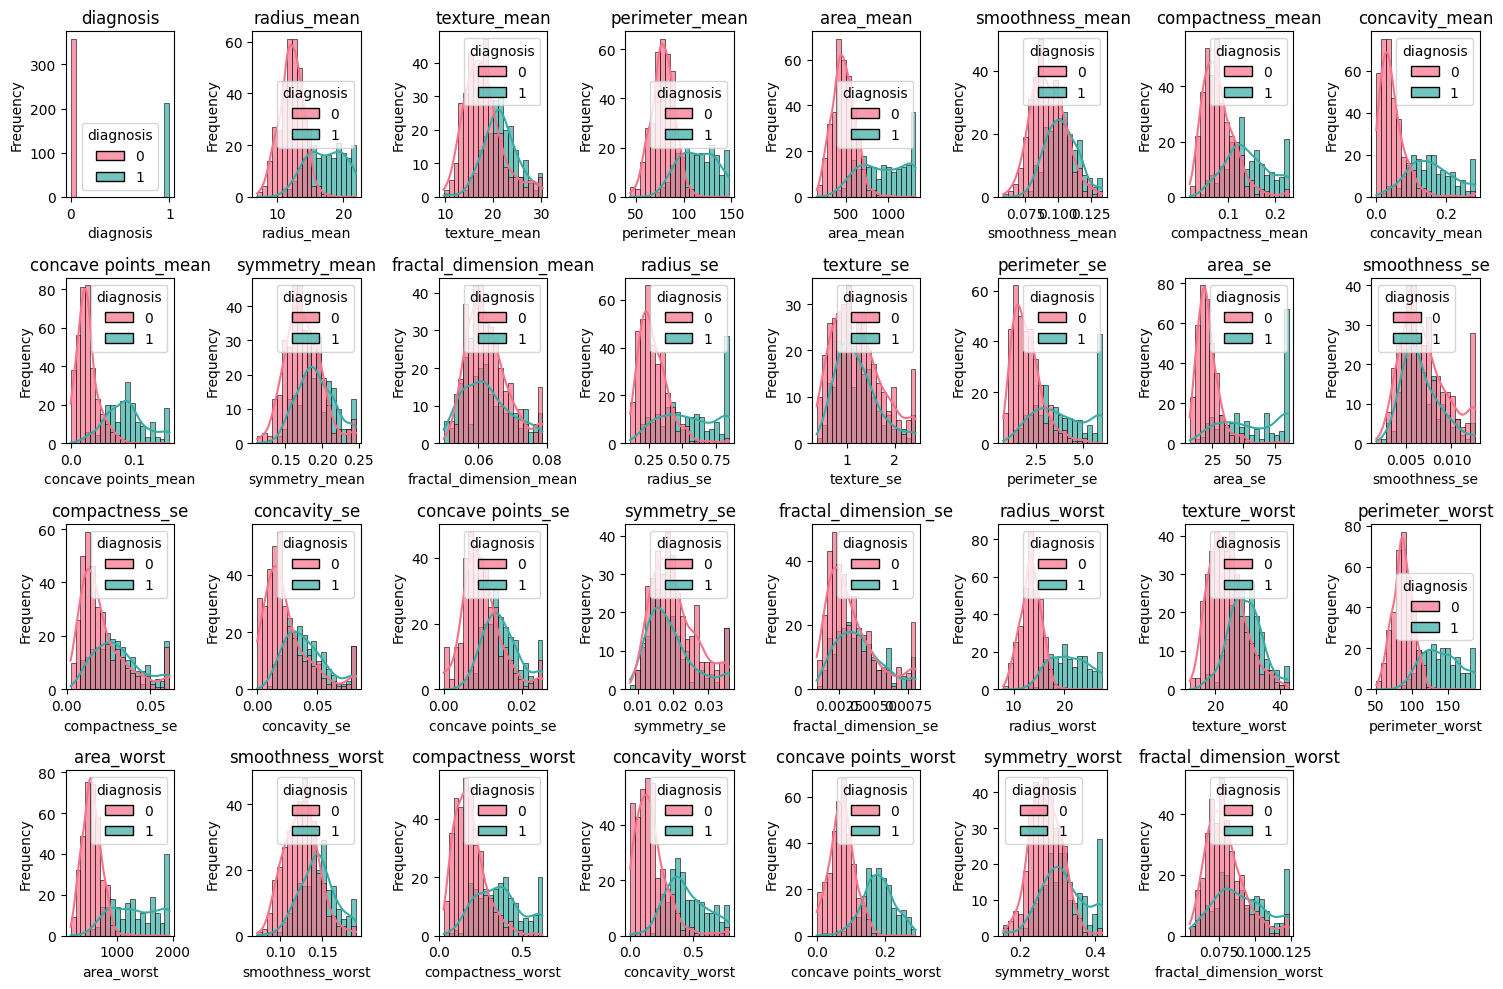

In [22]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(df, start=1):
    plt.subplot(4, 8, i)
    sns.histplot(data=df, x=feature, hue='diagnosis', bins=20, kde=True, palette='husl', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

# Another way of making Subplots using Boxplots inside it  

In [23]:

X_new_without_scaling = df.drop('diagnosis',axis= 1)

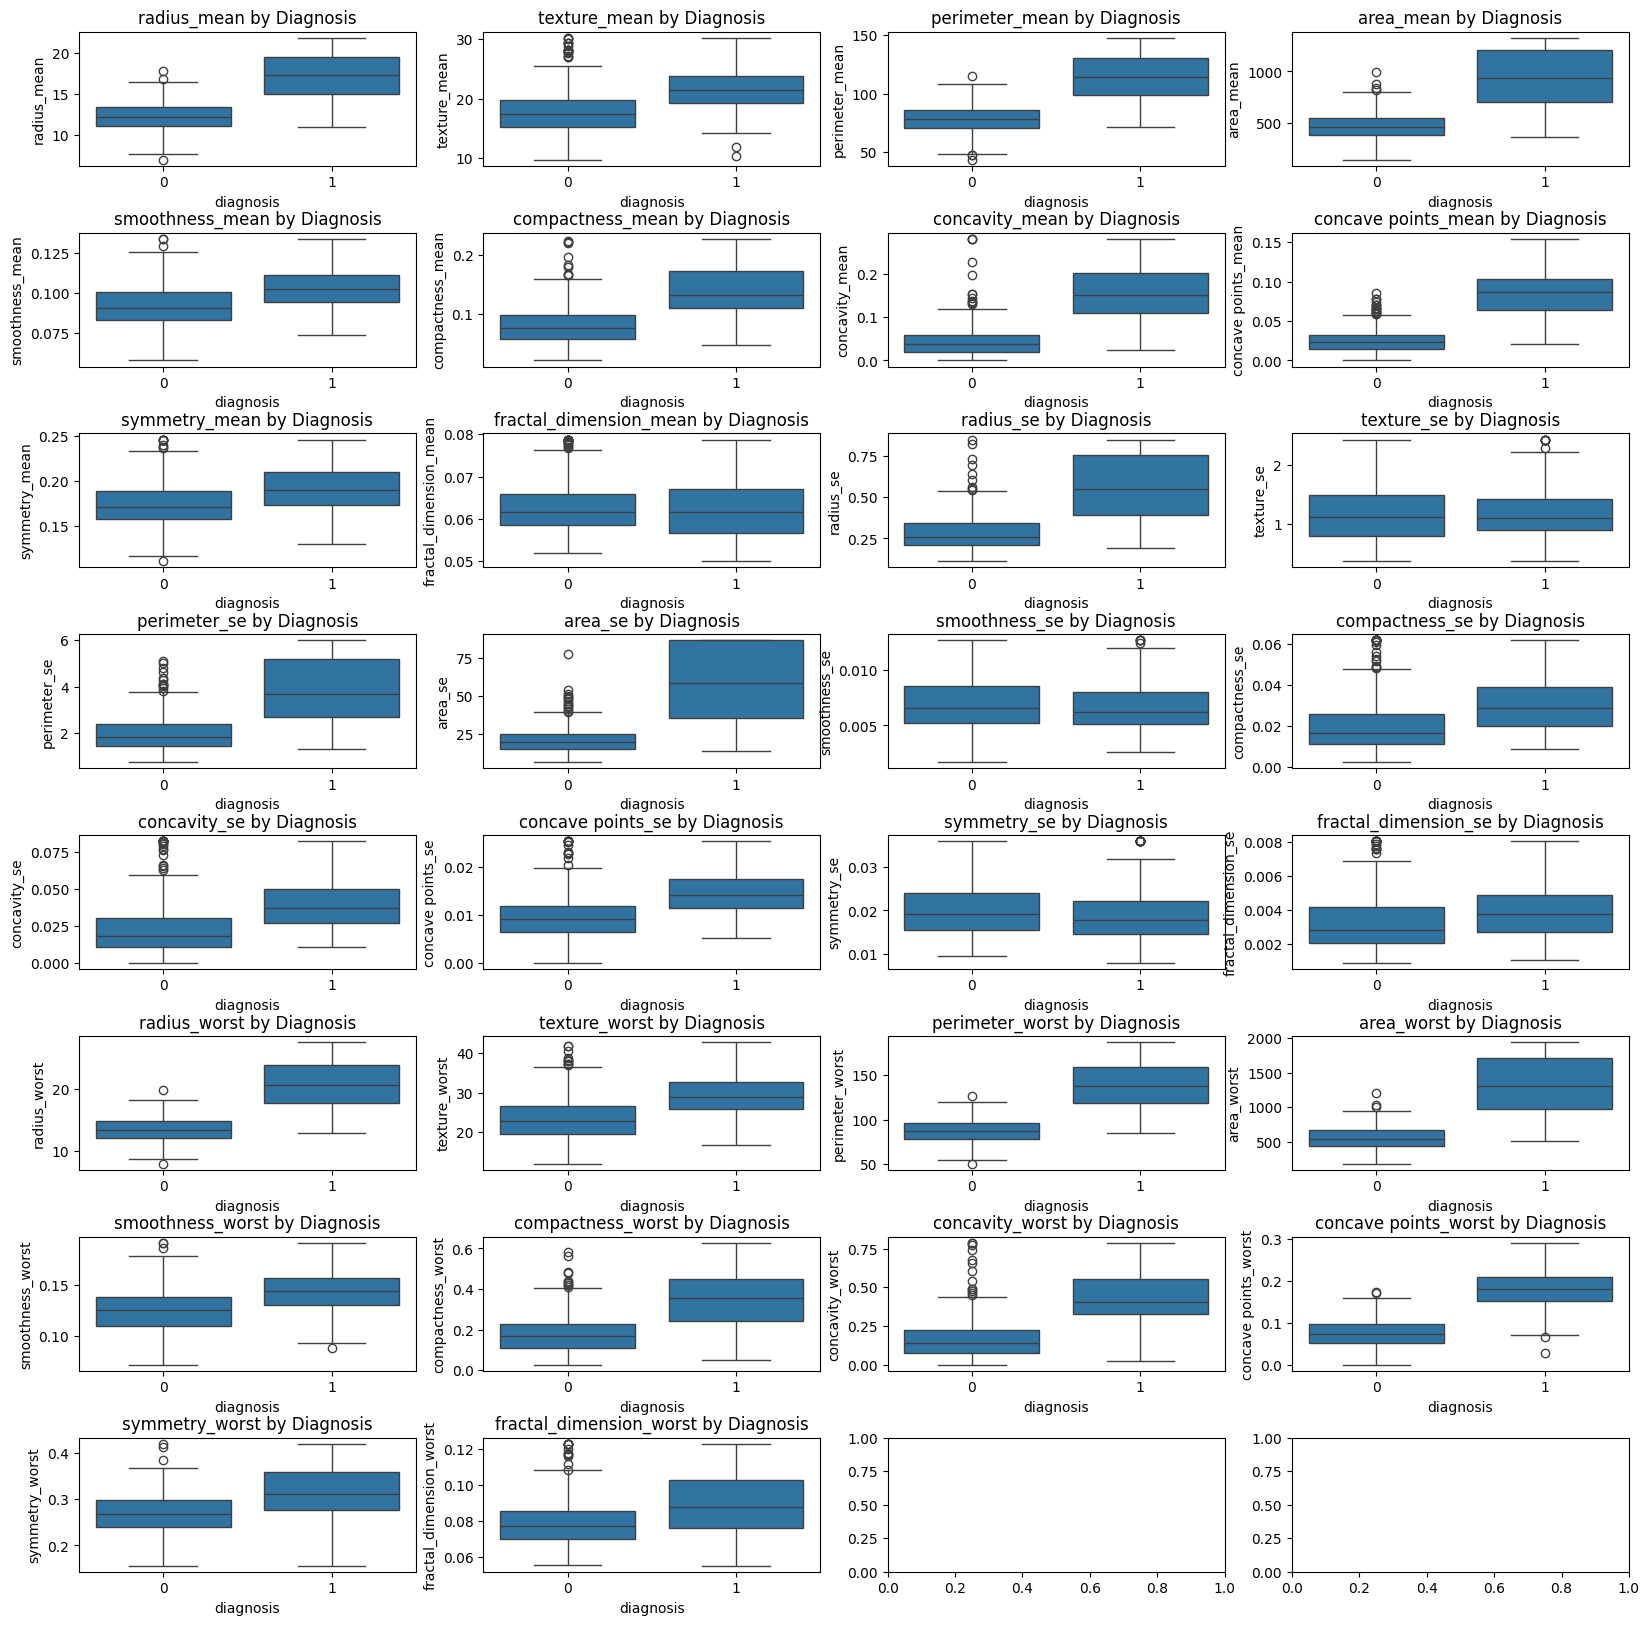

In [24]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, feature in enumerate(X_new_without_scaling):
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Diagnosis')

plt.show()

# Now scaling the data with another scaler (MinMaxScaler())

In [25]:
scaler2 = MinMaxScaler()

X_new = df.drop('diagnosis',axis= 1)

X_new = scaler2.fit_transform(X_new)

In [26]:
X_new

array([[0.73791809, 0.03262722, 0.76187262, ..., 0.91202749, 1.        ,
        0.93953215],
       [0.91085193, 0.39250061, 0.85926426, ..., 0.63917526, 0.45117076,
        0.49992644],
       [0.85186675, 0.56196737, 0.83130032, ..., 0.83505155, 0.77974491,
        0.47874062],
       ...,
       [0.64474831, 0.89457025, 0.62205294, ..., 0.48728522, 0.24861984,
        0.34073856],
       [0.91286279, 0.95544193, 0.92869196, ..., 0.91065292, 0.96021321,
        1.        ],
       [0.0522153 , 0.72218164, 0.0398245 , ..., 0.        , 0.49723967,
        0.22583493]])

# Importing the models again to make a dictionary with alot of models & hyper parameters 

In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {}
    }     
}

# Now testing Algorithms with MinMaxScaler using GridSearch to see the best hyper parameter in each model then choose the best accuracy between the models

In [28]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_new,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_gridsearch_scaled = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_gridsearch_scaled

model  best_score                 best_params
0                      svm    0.980702  {'C': 20, 'kernel': 'rbf'}
1            random_forest    0.957848        {'n_estimators': 10}
2      logistic_regression    0.980702                   {'C': 10}
3     naive_bayes_gaussian    0.931470                          {}
4  naive_bayes_multinomial    0.878761                          {}
5            decision_tree    0.917358                          {}

# Algorithms without scaling

In [29]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_new_without_scaling,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_gridsearch_without_scaling = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_gridsearch_without_scaling

c:\Users\Mohamed Barakat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mohamed Barakat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

model  best_score                    best_params
0                      svm    0.964866  {'C': 10, 'kernel': 'linear'}
1            random_forest    0.954308            {'n_estimators': 5}
2      logistic_regression    0.945552                      {'C': 10}
3     naive_bayes_gaussian    0.940258                             {}
4  naive_bayes_multinomial    0.891026                             {}
5            decision_tree    0.917373                             {}

# Making ELbow Plot to know the minimum number of clusters needed

In [30]:
from sklearn.cluster import KMeans

sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

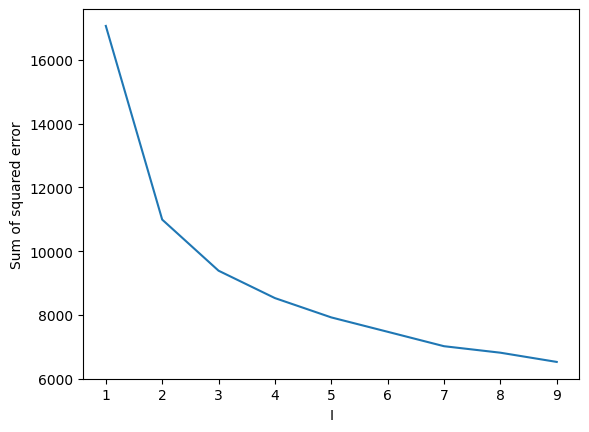

In [31]:
plt.xlabel('I')
plt.ylabel('Sum of squared error')
plt.xticks(range(1,10))
plt.plot(range(1,10),sse)

# Clusturing the data 

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X,y)
y_predicted

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,